# Setup

In [1]:
#import os
#import numpy as np
#import networkx as nx
import pandas as pd
#from pandas.plotting import scatter_matrix, parallel_coordinates
import seaborn as sns
#from sklearn import preprocessing
import matplotlib.pylab as plt

# Import Data

In [31]:
#Table 3.2: First Nine Records in the Boston Housing Data
housing_df = pd.read_csv('BostonHousing.csv')
housing_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1


# rename CAT. MEDV column for easier data handling

In [7]:
housing_df = housing_df.rename(columns={'CAT. MEDV':'CAT_MEDV'}) #categorical
housing_df.dtypes

CRIM        float64
ZN          float64
INDUS       float64
CHAS          int64
NOX         float64
RM          float64
AGE         float64
DIS         float64
RAD           int64
TAX           int64
PTRATIO     float64
LSTAT       float64
MEDV        float64
CAT_MEDV      int64
dtype: object

# Plots

## Viridis Color Pallette
Viridis
"#440154", "#482878", "#3E4989", "#31688E", "#26828E", "#1F9E89", "#35B779", "#6DCD59", "#B4DE2C", "#FDE725"

## scatter plot with axes names

<Axes: xlabel='LSTAT', ylabel='MEDV'>

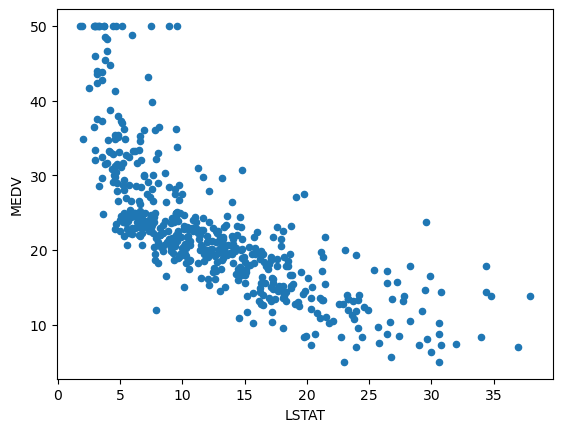

In [8]:
housing_df.plot.scatter(x='LSTAT', y='MEDV', legend=False)

In [9]:
housing_df['CHAS'].unique() #check unique value of CHAS column

array([0, 1], dtype=int64)

In [10]:
housing_df.mean() # calculate mean for all columns

CRIM          3.613524
ZN           11.363636
INDUS        11.136779
CHAS          0.069170
NOX           0.554695
RM            6.284634
AGE          68.574901
DIS           3.795043
RAD           9.549407
TAX         408.237154
PTRATIO      18.455534
LSTAT        12.653063
MEDV         22.532806
CAT_MEDV      0.166008
dtype: float64

In [11]:
housing_df.groupby('CHAS').mean() # compute mean per CHAS = (0, 1)

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT_MEDV
CHAS,,,,,,,,,,,,,
0,3.744447,11.634820,11.019193,0.551817,6.267174,67.911677,3.851915,9.566879,409.870488,18.527176,12.757941,22.093843,0.154989
1,1.851670,7.714286,12.719143,0.593426,6.519600,77.500000,3.029709,9.314286,386.257143,17.491429,11.241714,28.440000,0.314286


In [12]:
housing_df.groupby('CHAS').mean().MEDV #compute mean MEDV per CHAS = (0, 1)

CHAS
0    22.093843
1    28.440000
Name: MEDV, dtype: float64

## barchart of CHAS vs. mean MEDV

<Axes: xlabel='CHAS'>

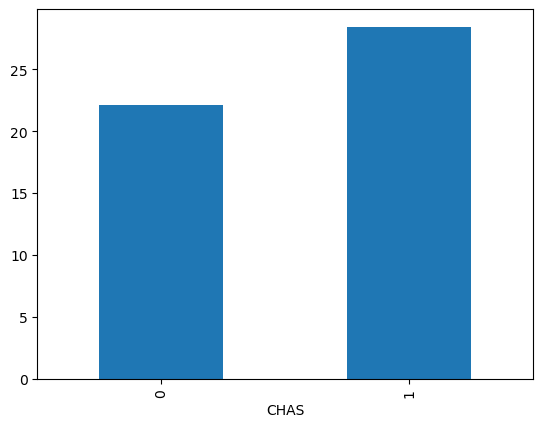

In [13]:
# compute mean MEDV per CHAS = (0, 1)
housing_df.groupby('CHAS').mean().MEDV.plot(kind='bar')

## barchart of CHAS vs. mean MEDV

Text(0, 0.5, 'Avg. MEDV')

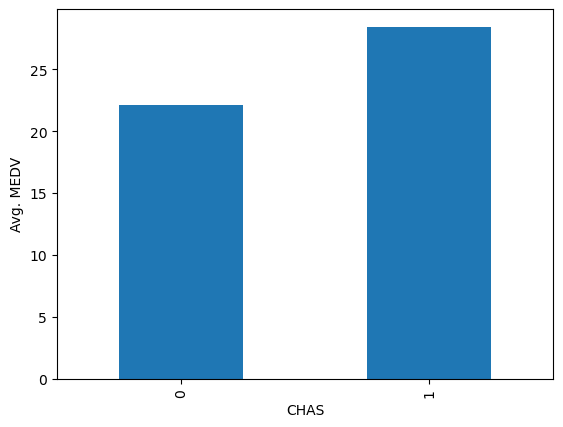

In [14]:
# compute mean MEDV per CHAS = (0, 1)
ax = housing_df.groupby('CHAS').mean().MEDV.plot(kind='bar')
# add ylabel
ax.set_ylabel('Avg. MEDV')
# Must be run together

## barchart of CHAS vs. CAT_MEDV %,

In [15]:
housing_df.groupby('CHAS').mean()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT_MEDV
CHAS,,,,,,,,,,,,,
0,3.744447,11.634820,11.019193,0.551817,6.267174,67.911677,3.851915,9.566879,409.870488,18.527176,12.757941,22.093843,0.154989
1,1.851670,7.714286,12.719143,0.593426,6.519600,77.500000,3.029709,9.314286,386.257143,17.491429,11.241714,28.440000,0.314286


Text(0, 0.5, 'CAT_MEDV %')

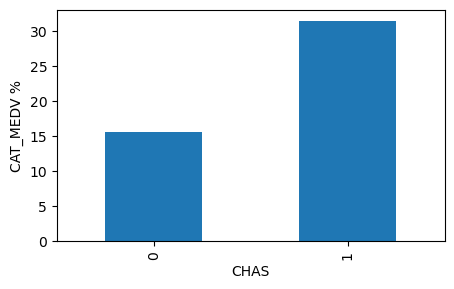

In [16]:
# run the following three lines together
dataForPlot = housing_df.groupby('CHAS').mean()['CAT_MEDV'] * 100
ax = dataForPlot.plot(kind='bar', figsize=[5, 3])
ax.set_ylabel('CAT_MEDV %')

# matplotlib version

## more info on matplotlib https://matplotlib.org/stable/index.html

### Set the color of the points in the scatterplot and draw as open circles.

Text(0, 0.5, 'MEDV')

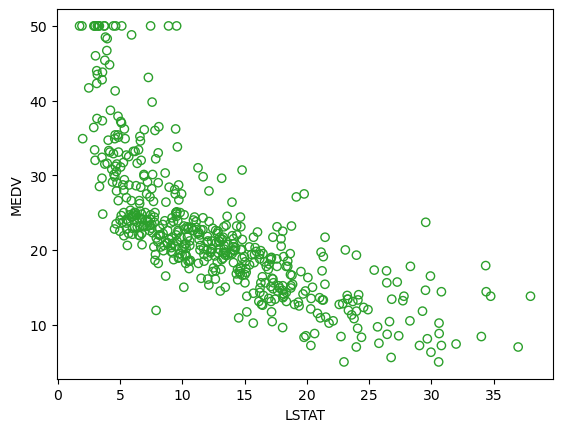

In [17]:
# run the following three lines together to get the correct diagram
plt.scatter(housing_df.LSTAT, housing_df.MEDV, color='C2', facecolor='none')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')

## barchart of CHAS vs. mean MEDV

In [18]:
# compute mean MEDV per CHAS = (0, 1)
dataForPlot = housing_df.groupby('CHAS').mean().MEDV

Text(0, 0.5, 'Avg. MEDV')

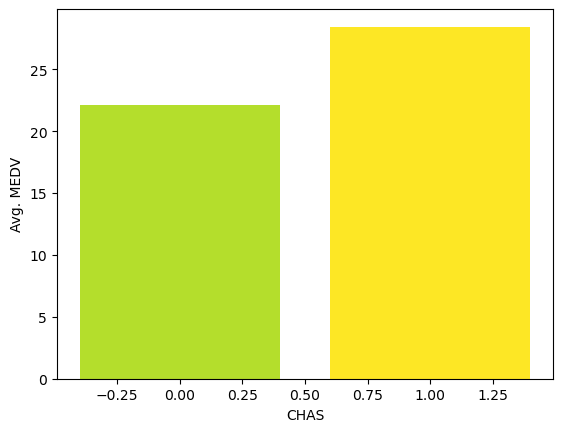

In [20]:
# run the following four lines together
fig, ax = plt.subplots() # return a figure and plots object;  first create a figure and then get a list of axes of a figure
ax.bar(dataForPlot.index, dataForPlot, color=["#B4DE2C", "#FDE725"])
ax.set_xlabel('CHAS')
ax.set_ylabel('Avg. MEDV')

## barchart of CHAS vs. CAT.MEDV 

<BarContainer object of 2 artists>

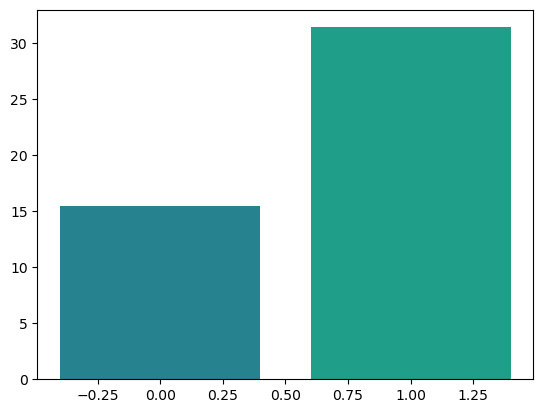

In [22]:
# run the following three lines together
dataForPlot = housing_df.groupby('CHAS').mean()['CAT_MEDV'] * 100
fig, ax = plt.subplots()
ax.bar(dataForPlot.index, dataForPlot, color=["#26828E", "#1F9E89"])

# Distribution charts for numerical variable MEDV

## histogram of MEDV

Text(0, 0.5, 'count')

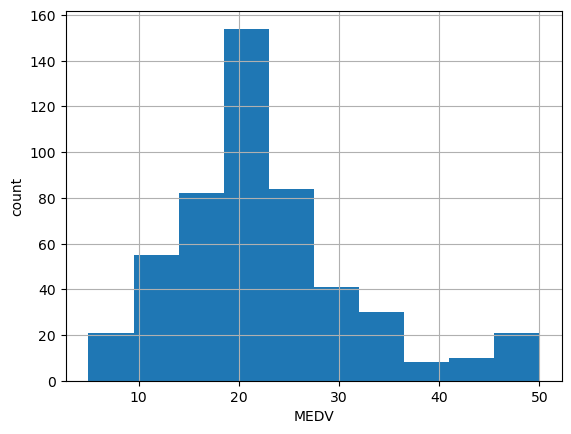

In [23]:
# run the following three lines together
ax = housing_df.MEDV.hist()
ax.set_xlabel('MEDV')
ax.set_ylabel('count')

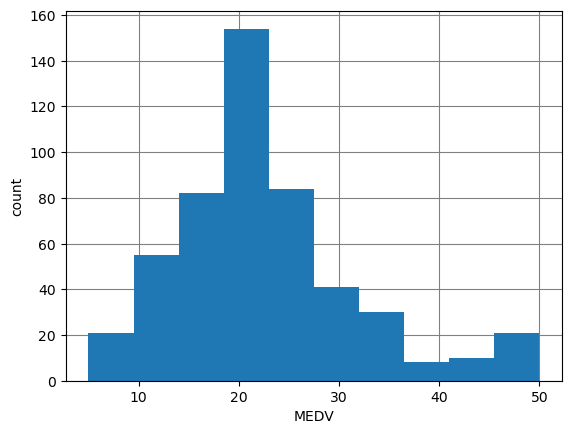

In [24]:
# alternative plot with matplotlib, run the following seven lines together
fig, ax = plt.subplots()
ax.hist(housing_df.MEDV)
ax.set_axisbelow(True) # Show the grid lines behind the histogram
ax.grid(which='major', color='grey', linestyle='-')
ax.set_xlabel('MEDV')
ax.set_ylabel('count')
plt.show()

## boxplot of MEDV for different values of CHAS, 

Text(0.5, 1.0, '')

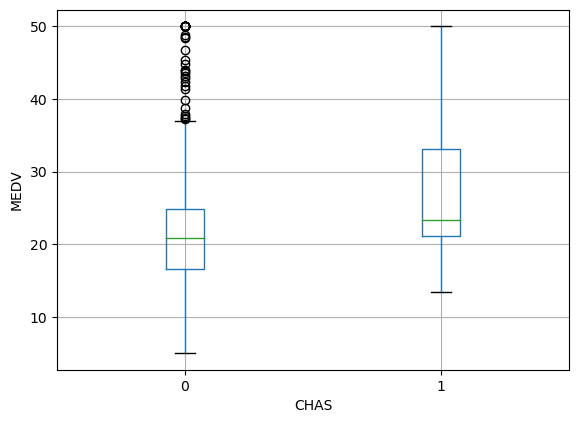

In [25]:
# run the following four lines together
ax = housing_df.boxplot(column='MEDV', by='CHAS')
ax.set_ylabel('MEDV')
plt.suptitle('') # Suppress the titles
plt.title('')

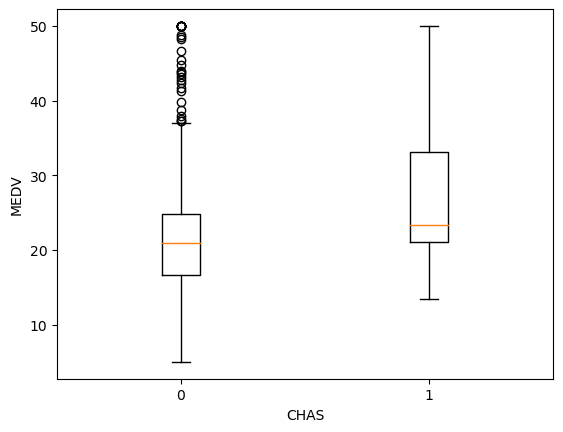

In [26]:
# alternative plot with matplotlib
housing_df[housing_df.CHAS==0].MEDV

# create array/list variable = []
dataForPlot = [list(housing_df[housing_df.CHAS==0].MEDV), list(housing_df[housing_df.CHAS==1].MEDV)] 
#dataForPlot = [housing_df[housing_df.CHAS==0].MEDV, housing_df[housing_df.CHAS==1].MEDV]

# run the following six lines together
fig, ax = plt.subplots()
ax.boxplot(dataForPlot) #  boxplot(x) : x Array or a sequence of vectors
ax.set_xticklabels([0, 1])
ax.set_xlabel('CHAS')
ax.set_ylabel('MEDV')
plt.show()

## side-by-side boxplots

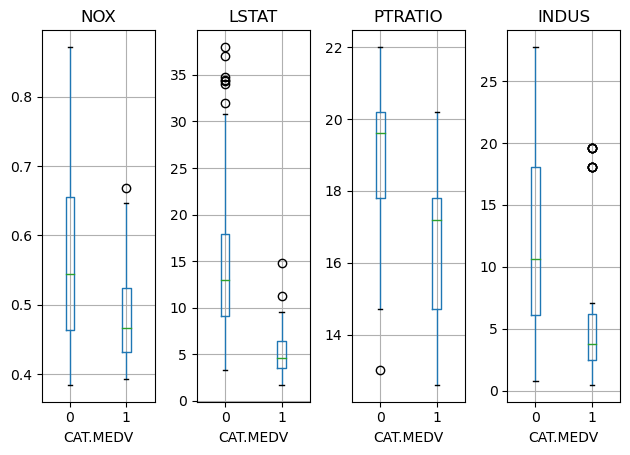

In [27]:
# run the following block together
fig, axes = plt.subplots(nrows=1, ncols=4)
housing_df.boxplot(column='NOX', by='CAT_MEDV', ax=axes[0])
housing_df.boxplot(column='LSTAT', by='CAT_MEDV', ax=axes[1])
housing_df.boxplot(column='PTRATIO', by='CAT_MEDV', ax=axes[2])
housing_df.boxplot(column='INDUS', by='CAT_MEDV', ax=axes[3])
for ax in axes:
    ax.set_xlabel('CAT.MEDV')
plt.suptitle('') # Suppress the overall title
plt.tight_layout() # Increase the separation between the plots

## simple heatmap of correlations (without values)

### more info on heatmap using seaborn https://indianaiproduction.com/seaborn-heatmap/

<Axes: >

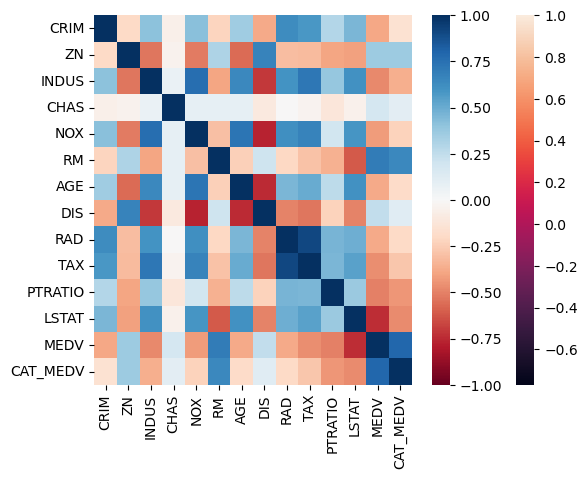

In [29]:
corr = housing_df.corr()
#import seaborn as sns
sns.heatmap(corr, 
            xticklabels=corr.columns, 
            yticklabels=corr.columns)

# Change the colormap to a divergent scale and fix the range of the colormap
sns.heatmap(corr, 
            xticklabels=corr.columns, 
            yticklabels=corr.columns, 
            vmin=-1, 
            vmax=1, 
            cmap="RdBu")# vmin & vmax set the limit of the colormap

<Axes: >

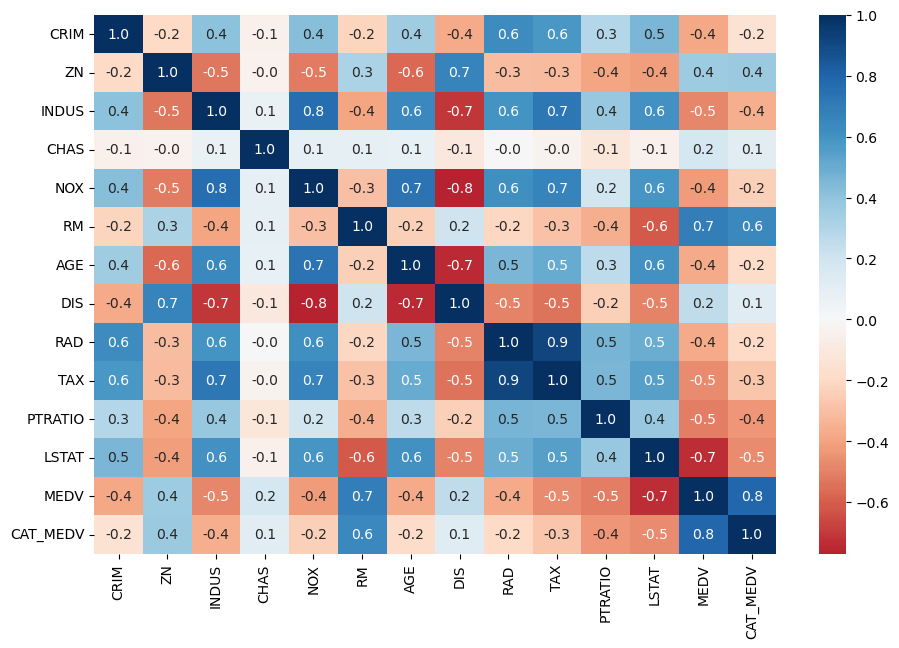

In [30]:
# Include information about values (example demonstrate how to control the size of the plot)
# run the block together
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
## annot add text, fmt add numerical value, one digit after decimal point, center will change the colormap
sns.heatmap(corr, 
            annot=True, 
            fmt=".1f", 
            cmap="RdBu", 
            center=0, 
            ax=ax)